In [1]:
# library for displaying plots
import matplotlib.pyplot as plt

# display plots in the notebook 
%matplotlib inline


In [36]:
# LOAD + PREPROCESSING

from sklearn import datasets
cancer = datasets.load_breast_cancer()
print(cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [37]:
from sklearn.model_selection import train_test_split
x_cancer, y_cancer = cancer.data, cancer.target
# Test set will be the 25% taken randomly
x_train, x_test, y_train, y_test = train_test_split(x_cancer, y_cancer, test_size=0.25, random_state=33)
print(x_train.shape, x_test.shape)

(426, 30) (143, 30)


In [38]:
# Standarization
from sklearn import  preprocessing
scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [39]:
# creating a classifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

model = KNeighborsClassifier(n_neighbors = 15)

# Fit
model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')

In [40]:
print('Prediction: ', model.predict(x_train))
print('Expected: ', y_train)

Prediction:  [0 0 1 1 0 0 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 0 0 1 1 0 0 0 0 1 1 1 1 1 0
 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 0 1 1 0
 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 1 0 0 1 0 1 1 1 0 0 1 1 1 0 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1
 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 0 0 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 0 0 0 0 1 0 1 1 1 0 1 1 1 0
 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 0 1 0 1 1 1 1 1 0
 0 0 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 1 1 0 1 1 1 0 0
 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 1 1 0
 1 1 1 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0
 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1]
Expected:  [0 0 1 1 0 0 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 0 0 1 1 0 0 0 0 1 0 1 1 1 0
 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 0

In [41]:
# Evaluate accuracy
from sklearn import  metrics
y_train_pred = model.predict(x_train)
print('Accuracy in training: ', metrics.accuracy_score(y_train, y_train_pred))

Accuracy in training:  0.967136150235


In [42]:
# Now we are going to use the Decision tree

from sklearn.tree import DecisionTreeClassifier
import numpy as np

from sklearn import tree

max_depth=3
random_state=1

# Model
model = tree.DecisionTreeClassifier(max_depth=max_depth, random_state=random_state)

# train
model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [43]:
print('Prediction: ', model.predict(x_train))
print('Expected: ', y_train)

Prediction:  [0 0 1 1 0 0 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 0 0 1 1 0 0 0 0 1 0 1 1 1 0
 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 0
 1 1 0 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 1 0 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 1 0 1 1 0 1 0 1 1 1 0 1 0 1
 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 0 0 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 0 0 0 0 1 0 1 1 1 0 1 1 1 0
 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 0 1 0 1 1 1 1 1 0
 0 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 0 1 0 1 0 0 1 0 1 0 0 1 1 0 1 1 1 0 0
 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 1 1 0
 0 1 1 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 1 0 1 0
 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1]
Expected:  [0 0 1 1 0 0 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 0 0 1 1 0 0 0 0 1 0 1 1 1 0
 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 0

In [44]:
# accuracy
y_train_pred = model.predict(x_train)
print('Accuracy: ', metrics.accuracy_score(y_train, y_train_pred))

Accuracy:  0.967136150235


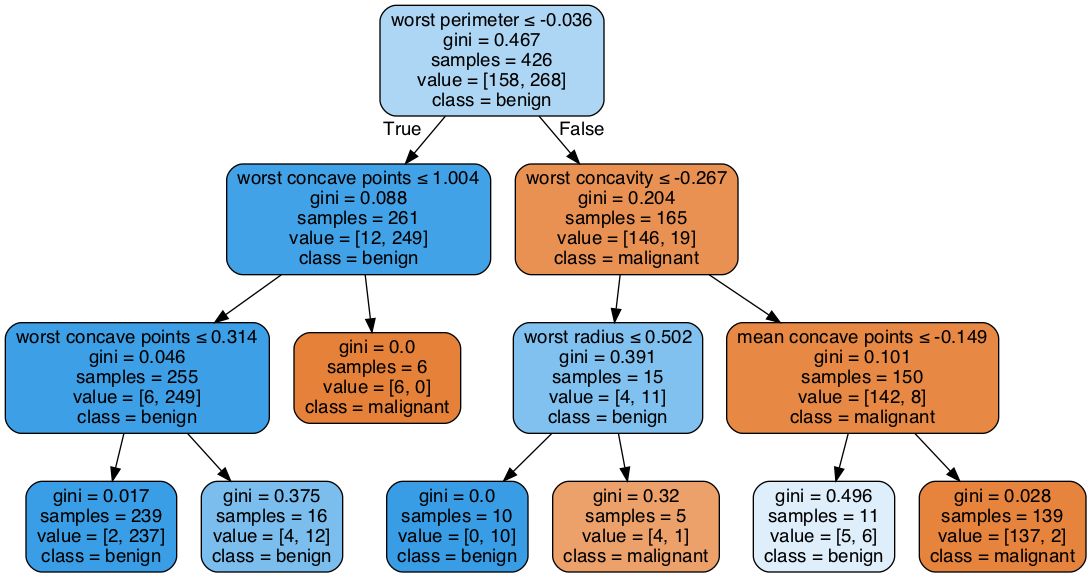

In [46]:
from IPython.display import Image 
from sklearn.externals.six import StringIO
import pydotplus as pydot

dot_data = StringIO()  
tree.export_graphviz(model, out_file=dot_data,  
                         feature_names=cancer.feature_names,  
                         class_names=cancer.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  


graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
graph.write_png('boston-tree.png')
Image(graph.create_png())  

K-Fold cross validation

In [47]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Estimator-> pipeline of preprocessing and KNN model
model = Pipeline([
    ('scaler', StandardScaler()),
    ('DecisionTree', DecisionTreeClassifier())
])
# k-fold cross validation
cv = KFold(10, shuffle=True, random_state=33)

scores = cross_val_score(model, x_cancer, y_cancer, cv=cv)
print(scores)

[ 0.9122807   0.89473684  0.96491228  0.92982456  0.9122807   0.92982456
  0.96491228  0.87719298  0.94736842  0.89285714]


In [49]:
from scipy.stats import sem
def mean_score(scores):
    return ("Mean score: {0:.3f} (+/- {1:.3f})").format(np.mean(scores), sem(scores))
print(mean_score(scores))

Mean score: 0.923 (+/- 0.010)
